# Process the Load Data for the NTP Heat Wave Grid Stress Events


In [1]:
# Start by importing the packages we need:
import os
import glob

import pandas as pd


## Set the Directory Structure

In [4]:
# Identify the data input and image output directories:
tell_data_input_dir =  '/Users/burl878/Documents/Code/code_repos/ntp_heat_wave_loads/data/TELL_Data/'
data_output_dir =  '/Users/burl878/Documents/Code/code_repos/ntp_heat_wave_loads/data/'


## Create a Function to Read in the 2035 GridView Data Used in Scaling


In [5]:
def process_gridview_data(data_input_dir: str):
    # Check to see if the processed output file exist and if not then create it:
    if os.path.isfile((os.path.join(data_input_dir, 'Processed_Gridview_2035_Data.csv'))) == False:
       
       # Read in the .csv file:
       gv_data = pd.read_csv((data_input_dir + 'wecc_load_2035.csv'))

    
    else:
       # Read in the already processed output file:
       gv_data = pd.read_csv((os.path.join(data_input_dir, 'Processed_Gridview_2035_Data.csv')))       
        
    return gv_data


In [6]:
gv_data = process_gridview_data(data_input_dir = data_output_dir)

gv_data


Index  Load_AVA_2030.dat  Load_AZPS_2030.dat  Load_BANC_2030.dat  \
0     Year       2.030000e+03        2.030000e+03        2.030000e+03   
1        1       1.826536e+03        4.081696e+03        2.393232e+03   
2        2       1.752176e+03        3.900002e+03        2.266459e+03   
3        3       1.698476e+03        3.800484e+03        2.144252e+03   
4        4       1.679724e+03        3.725500e+03        2.079399e+03   
...    ...                ...                 ...                 ...   
8790  8790                NaN                 NaN                 NaN   
8791   AVG       1.941051e+03        5.224456e+03        2.772862e+03   
8792   SUM       1.700360e+07        4.576623e+07        2.429027e+07   
8793   MAX       2.834934e+03        1.001995e+04        4.270591e+03   
8794   MIN       1.239254e+03        3.036640e+03        1.757525e+03   

      Load_BPAT_2030.dat  Load_CHPD_2030.dat  Load_CIPB_2030_CEC.dat  \
0           2.030000e+03        2.030000e+03            2.030000e+03   
1           7.158996e+03        2.568631e+02            5.501092e+03   
2           6.840861e+03        2.455434e+02            5.209690e+03   
3           6.608040e+03        2.378030e+02            4.928783e+03   
4           6.545084e+03        2.353615e+02            4.779713e+03   
...                  ...                 ...                     ...   
8790                 NaN                 NaN                     NaN   
8791        7.502142e+03        2.673897e+02            6.373710e+03   
8792        6.571876e+07        2.342334e+06            5.583370e+07   
8793        1.105331e+04        3.976689e+02            9.816394e+03   
8794        4.838326e+03        1.732439e+02            4.039853e+03   

      Load_CIPV_2030_CEC.dat  Load_CISC_2030_CEC.dat  Load_CISD_2030_CEC.dat  \
0               2.030000e+03            2.030000e+03            2.030000e+03   
1               6.529678e+03            1.710263e+04            3.667869e+03   
2               6.183630e+03            1.619495e+04            3.472814e+03   
3               5.850306e+03            1.532309e+04            3.285721e+03   
4               5.673379e+03            1.485922e+04            3.186448e+03   
...                      ...                     ...                     ...   
8790                     NaN                     NaN                     NaN   
8791            7.565410e+03            1.981482e+04            4.249305e+03   
8792            6.627299e+07            1.735778e+08            3.722391e+07   
8793            1.165187e+04            3.051868e+04            6.545116e+03   
8794            4.795227e+03            1.255973e+04            2.693574e+03   

      ...  Load_SPPC_2030.dat  Load_SRP_2030.dat  Load_TEPC_2030.dat  \
0     ...        2.030000e+03       2.030000e+03        2.030000e+03   
1     ...        1.445050e+03       4.400017e+03        1.777027e+03   
2     ...        1.381174e+03       4.204217e+03        1.695901e+03   
3     ...        1.338731e+03       4.097630e+03        1.641415e+03   
4     ...        1.322761e+03       4.016869e+03        1.606611e+03   
...   ...                 ...                ...                 ...   
8790  ...                 NaN                NaN                 NaN   
8791  ...        1.642854e+03       5.639125e+03        2.231225e+03   
8792  ...        1.439140e+07       4.939873e+07        1.954553e+07   
8793  ...        2.812820e+03       1.083499e+04        4.120553e+03   
8794  ...        1.041614e+03       3.272188e+03        1.328422e+03   

      Load_TIDC_2030.dat  Load_TPWR_2030.dat  Load_VEA_2030.dat  \
0           2.030000e+03        2.030000e+03       2.030000e+03   
1           3.558483e+02        5.902304e+02       1.189670e+02   
2           3.369984e+02        5.642115e+02       1.137502e+02   
3           3.188275e+02        5.463917e+02       1.103514e+02   
4           3.091846e+02        5.407860e+02       1.091103e+02   
...                  ...           

In [13]:
# Read in the state-level time series for 'rcp85hotter_ssp5':
df_one = pd.read_csv(data_input_dir + 'rcp85hotter_ssp5/2080/TELL_Balancing_Authority_Hourly_Load_Data_2080_Scaled_2080.csv')

# Rename a few columns for simplicity:
df_one.rename(columns={'Scaled_TELL_BA_Load_MWh': 'Load_One_MWh'}, inplace=True)

# Only keep the columns that are needed:
df_one = df_one[['BA_Code', 'Time_UTC', 'Load_One_MWh']].copy()

# Read in the state-level time series for 'rcp45hotter_ssp5':
df_two = pd.read_csv(data_input_dir + 'rcp45hotter_ssp5/2080/TELL_Balancing_Authority_Hourly_Load_Data_2080_Scaled_2080.csv')
            
# Rename a few columns for simplicity:
df_two.rename(columns={'Scaled_TELL_BA_Load_MWh': 'Load_Two_MWh'}, inplace=True)
       
# Only keep the columns that are needed:
df_two = df_two[['BA_Code', 'Time_UTC', 'Load_Two_MWh']].copy()
        
# Merge the two time series together on state name and time:
merged_df = df_one.merge(df_two, on=['BA_Code', 'Time_UTC'])
            
# Calculate the mean load between the two time-series as well as the absolute and relative load biases:
merged_df['Mean_Load_MWh'] =  merged_df[['Load_One_MWh', 'Load_Two_MWh']].mean(axis=1)
merged_df['Absolute_Difference_MWh'] = abs(merged_df['Load_One_MWh'] - merged_df['Load_Two_MWh'])
merged_df['Relative_Difference_%'] = 100*(merged_df['Absolute_Difference_MWh']/merged_df['Mean_Load_MWh']).round(4)

# Convert the time to a datetime variable:
merged_df['Time_UTC'] = pd.to_datetime(merged_df['Time_UTC'], format='%Y-%m-%d %H:%M:%S')

# Subset to just the data for CISO:
merged_df = merged_df[merged_df['BA_Code'] == 'CISO'].copy()

# Subset to the top 10% of all mean load hours:
peak_df = merged_df.nlargest(876,'Mean_Load_MWh')

# Compute the mean absolute and relative differences for the full dataset and peak subset:
merged_df['Mean_Abs_Diff_MWh'] = merged_df['Absolute_Difference_MWh'].mean().round(2)
merged_df['Mean_Rel_Diff_%'] = merged_df['Relative_Difference_%'].mean().round(2)
merged_df['Peak_Abs_Diff_M1_MWh'] = peak_df['Absolute_Difference_MWh'].mean().round(2)
merged_df['Peak_Rel_Diff_M1_%'] = peak_df['Relative_Difference_%'].mean().round(2)
merged_df['Peak_Abs_Diff_M2_MWh'] = (abs(merged_df['Load_One_MWh'].max() - merged_df['Load_Two_MWh'].max())).round(2)
merged_df['Peak_Rel_Diff_M2_%'] = 100*(merged_df['Peak_Abs_Diff_M2_MWh'] / ((merged_df['Load_One_MWh'].max() + merged_df['Load_Two_MWh'].max())/2)).round(2)


## Make the Plot


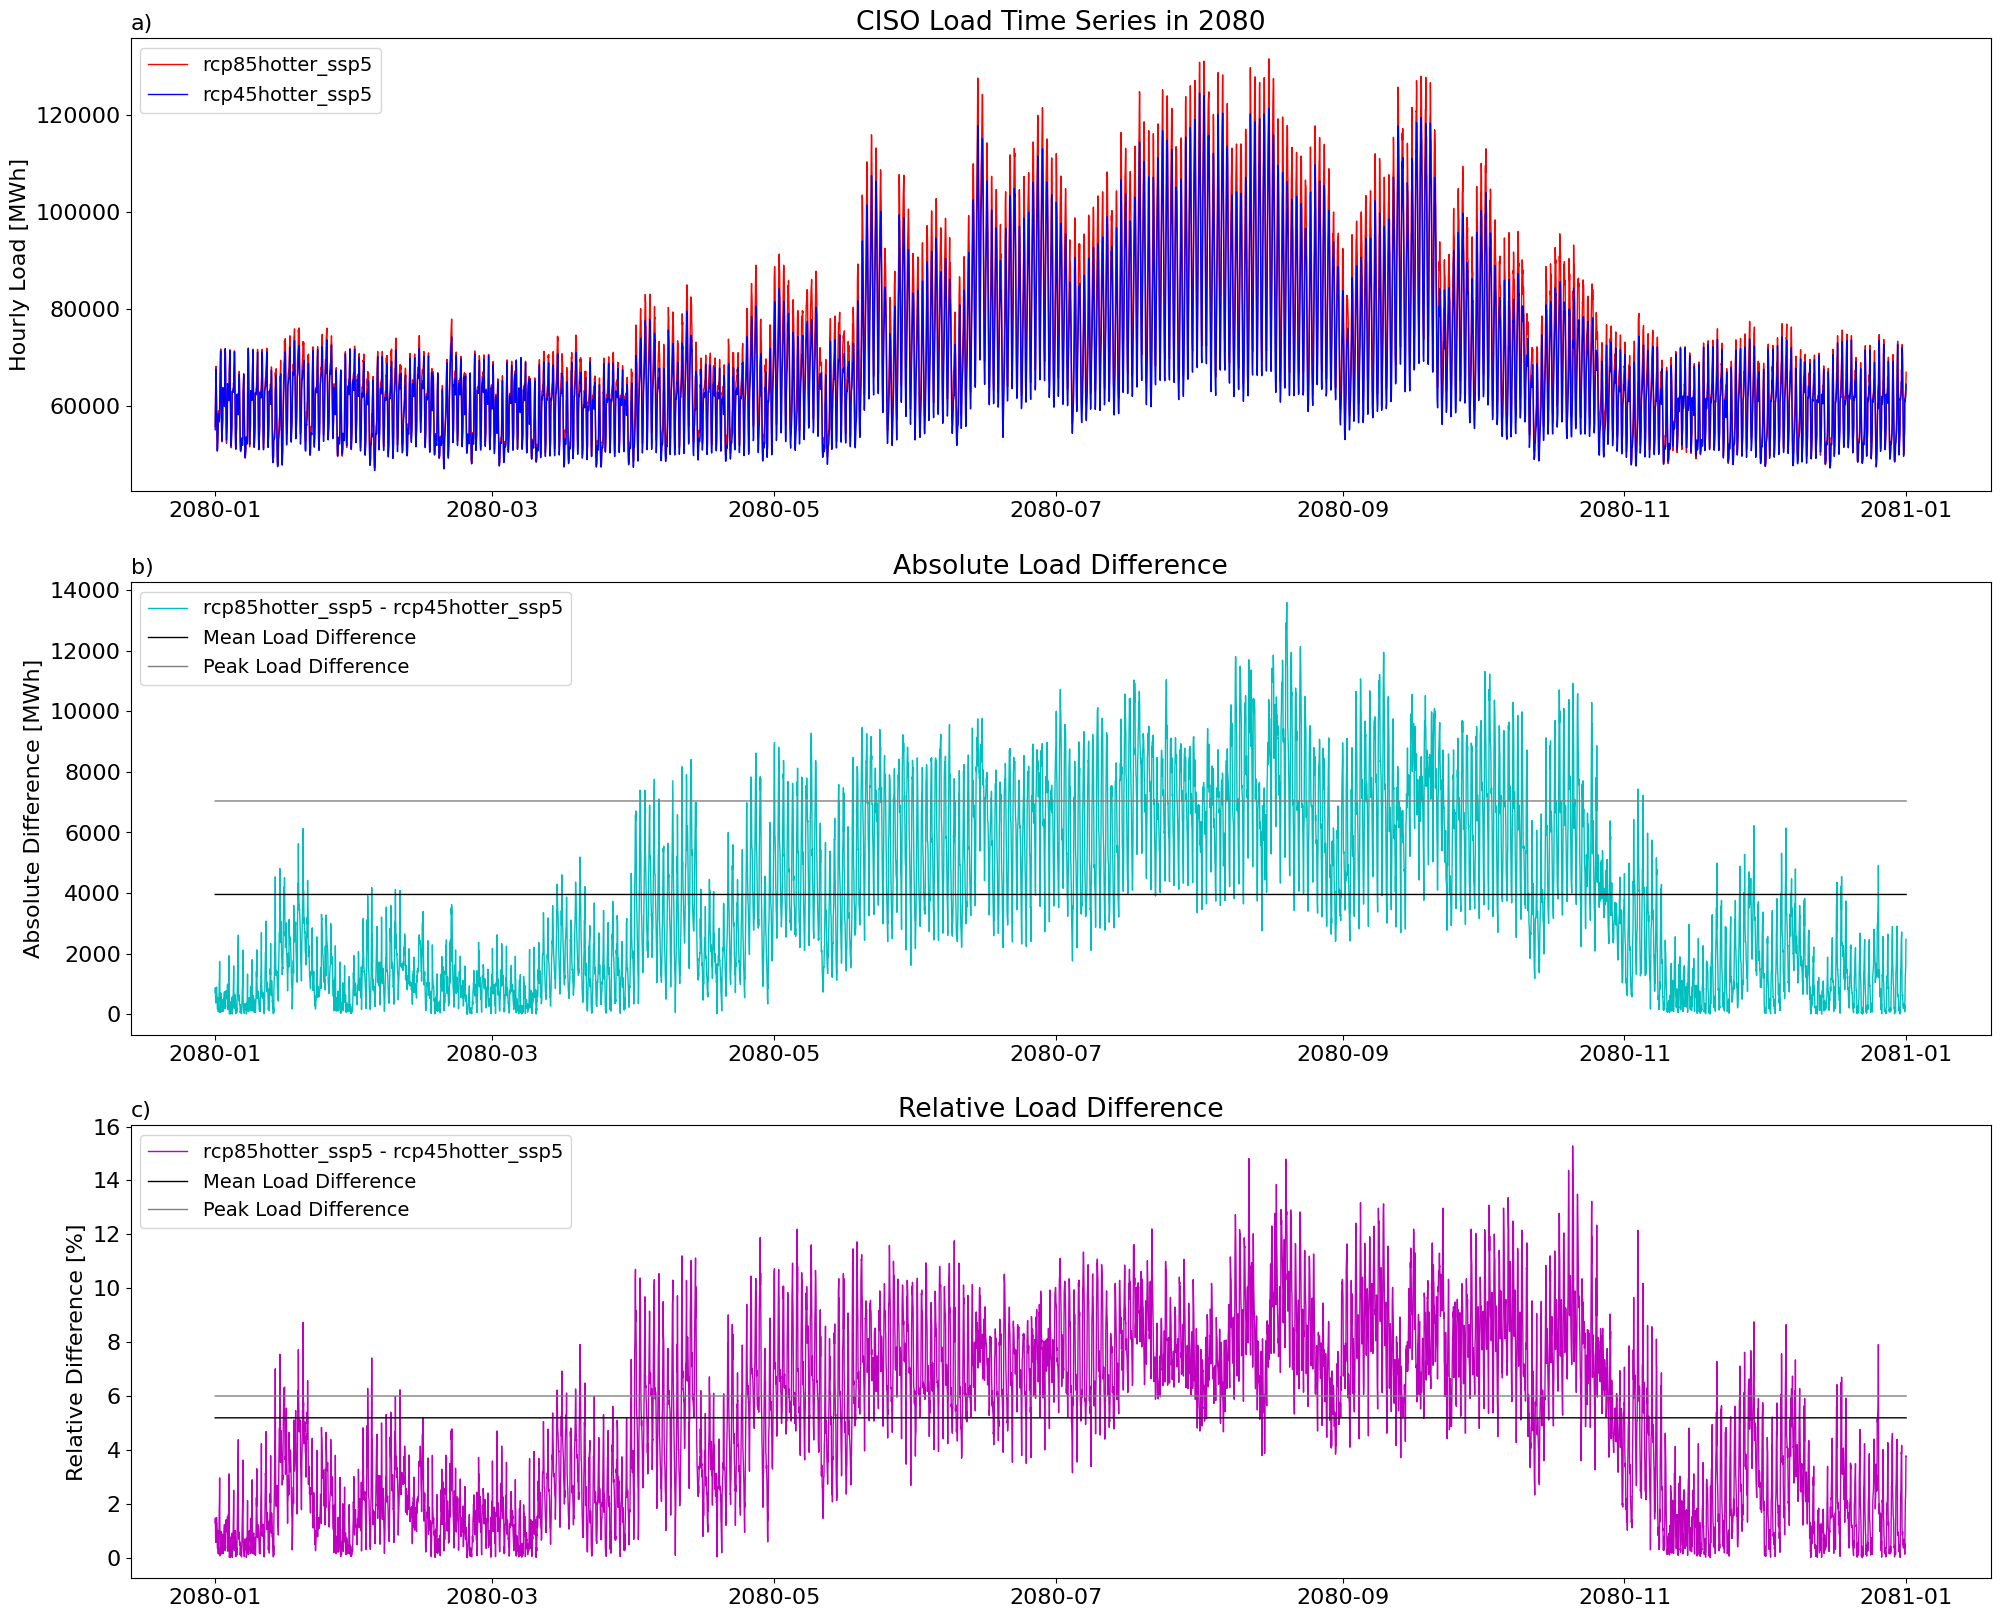

In [17]:
# Make the plot:
plt.figure(figsize=(24, 20))
plt.rcParams['font.size'] = 16
    
plt.subplot(311)
plt.plot(merged_df['Time_UTC'], merged_df['Load_One_MWh'], color='r', linestyle='-', label='rcp85hotter_ssp5', linewidth=1)
plt.plot(merged_df['Time_UTC'], merged_df['Load_Two_MWh'], color='b', linestyle='-', label='rcp45hotter_ssp5', linewidth=1)
plt.legend(loc='upper left', prop={'size': 14})
plt.xlabel('')
plt.ylabel('Hourly Load [MWh]')
plt.title('CISO Load Time Series in 2080')
plt.title('a)', loc='left', fontsize=16)

plt.subplot(312)
plt.plot(merged_df['Time_UTC'], merged_df['Absolute_Difference_MWh'], color='c', linestyle='-', label='rcp85hotter_ssp5 - rcp45hotter_ssp5', linewidth=1)
plt.plot(merged_df['Time_UTC'], merged_df['Mean_Abs_Diff_MWh'], color='k', linestyle='-', label='Mean Load Difference', linewidth=1)
plt.plot(merged_df['Time_UTC'], merged_df['Peak_Abs_Diff_M2_MWh'], color='gray', linestyle='-', label='Peak Load Difference', linewidth=1)
plt.legend(loc='upper left', prop={'size': 14})
plt.xlabel('') 
plt.ylabel('Absolute Difference [MWh]')
plt.title('Absolute Load Difference')
plt.title('b)', loc='left', fontsize=16)

plt.subplot(313)
plt.plot(merged_df['Time_UTC'], merged_df['Relative_Difference_%'], color='m', linestyle='-', label='rcp85hotter_ssp5 - rcp45hotter_ssp5', linewidth=1)
plt.plot(merged_df['Time_UTC'], merged_df['Mean_Rel_Diff_%'], color='k', linestyle='-', label='Mean Load Difference', linewidth=1)
plt.plot(merged_df['Time_UTC'], merged_df['Peak_Rel_Diff_M2_%'], color='gray', linestyle='-', label='Peak Load Difference', linewidth=1)
plt.legend(loc='upper left', prop={'size': 14})
plt.xlabel('') 
plt.ylabel('Relative Difference [%]')
plt.title('Relative Load Difference')
plt.title('c)', loc='left', fontsize=16)

filename = ('Calculations.png')
plt.savefig(os.path.join(image_output_dir, filename), dpi=300, bbox_inches='tight', facecolor='white')
